In [58]:
import pandas as pd

In [30]:
college = pd.read_csv('../DataSets/College.csv')

In [31]:
college.head()

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college[['Apps','Accept', 'Enroll', 'Top10perc']].describe().to_markdown()

In [ ]:
college.columns

Index(['School', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')

In [ ]:
def colorF(publicprivate):
    return (publicprivate == 'Yes').astype('int32')

In [59]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

In [ ]:
college['Money'] = (5/12)*college['perc_alumni'] + (1/12)*college['Expend']+(1/2)*college['PhD']

In [ ]:
college['Choosy'] = (100/2)*college['Accept']/college['Apps'] + (1/2)*college['Top10perc']

In [ ]:
college['f_ugrad_perc'] = 100*college['F_Undergrad']/(college['F_Undergrad'] + college['P_Undergrad'])

array([[<Axes: xlabel='Choosy', ylabel='Choosy'>,
        <Axes: xlabel='S_F_Ratio', ylabel='Choosy'>,
        <Axes: xlabel='perc_alumni', ylabel='Choosy'>,
        <Axes: xlabel='Grad_Rate', ylabel='Choosy'>,
        <Axes: xlabel='Money', ylabel='Choosy'>,
        <Axes: xlabel='f_ugrad_perc', ylabel='Choosy'>],
       [<Axes: xlabel='Choosy', ylabel='S_F_Ratio'>,
        <Axes: xlabel='S_F_Ratio', ylabel='S_F_Ratio'>,
        <Axes: xlabel='perc_alumni', ylabel='S_F_Ratio'>,
        <Axes: xlabel='Grad_Rate', ylabel='S_F_Ratio'>,
        <Axes: xlabel='Money', ylabel='S_F_Ratio'>,
        <Axes: xlabel='f_ugrad_perc', ylabel='S_F_Ratio'>],
       [<Axes: xlabel='Choosy', ylabel='perc_alumni'>,
        <Axes: xlabel='S_F_Ratio', ylabel='perc_alumni'>,
        <Axes: xlabel='perc_alumni', ylabel='perc_alumni'>,
        <Axes: xlabel='Grad_Rate', ylabel='perc_alumni'>,
        <Axes: xlabel='Money', ylabel='perc_alumni'>,
        <Axes: xlabel='f_ugrad_perc', ylabel='perc_alumni'>],
 

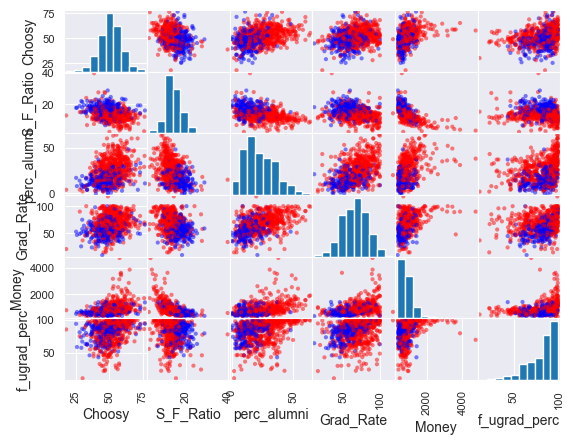

In [ ]:
pd.plotting.scatter_matrix(college[['Choosy','S_F_Ratio','perc_alumni','Grad_Rate', 'Money', 'f_ugrad_perc']], c=colorF(college['Private'].to_numpy()), cmap='bwr')

In [60]:
import numpy as np

In [61]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
X = college[['Choosy','S_F_Ratio','perc_alumni','Grad_Rate', 'f_ugrad_perc']].to_numpy()
y = colorF(college['Private'])
clf = LogisticRegression(max_iter=300).fit(X,y)

In [ ]:
clf.coef_

array([[ 0.01968132, -0.24689272,  0.07704142,  0.01869254, -0.02548524,
         0.00047042]])

In [ ]:
smp_i = np.random.randint(len(X), size=50)
np.sum(np.abs(clf.predict(X[smp_i]) - y[smp_i]))

np.int64(7)

In [ ]:
manyapp = college[college['Apps'] < 1000]
len(manyapp['Apps'])

322

In [ ]:
X = manyapp[['Choosy','S_F_Ratio','perc_alumni','Grad_Rate', 'f_ugrad_perc', 'perc_alumni']].to_numpy()
y = colorF(manyapp['Private'])
clf = LogisticRegression(max_iter=300).fit(X,y)

In [ ]:
clf.coef_

array([[ 0.01884821, -0.29846142,  0.03679434,  0.06711351, -0.040306  ,
         0.03679434]])

In [ ]:
y = y.to_numpy()

In [ ]:
smp_i = np.random.randint(len(X), size=50)
np.sum(np.abs(clf.predict(X[smp_i]) - y[smp_i]))

np.int64(11)

In [ ]:
sumr = pd.read_csv('../Lectures/Lecture03-PrimerRandom_Functions/summer.csv')

In [ ]:
len(sumr['NO'])

578

In [ ]:
sumr['SO2'].describe()

count    578.000000
mean      17.368512
std       29.264363
min        0.000000
25%        5.000000
50%        8.000000
75%       15.000000
max      313.000000
Name: SO2, dtype: float64

In [ ]:
y = (sumr['SO2'].to_numpy()>8).astype('int32')
X = sumr[['NO2', 'NO', 'PM10','O3']].to_numpy()

In [ ]:
clf = LogisticRegression(max_iter=300).fit(X,y)

In [ ]:
smp_i = np.random.randint(len(X), size=50)
np.sum(np.abs(clf.predict(X[smp_i]) - y[smp_i]))

np.int64(11)

---

In [ ]:
sw = pd.read_csv('StarWars_clean.csv')

In [ ]:
sw.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen I', 'Seen II', 'Seen III', 'Seen IV', 'Seen V', 'Seen VI',
       'Rank I', 'Rank II', 'Rank III', 'Rank IV', 'Rank V', 'Rank VI',
       'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P1', 'R2 D1',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [ ]:
sw.describe()

,RespondentID,Seen I,Seen II,Seen III,Seen IV,Seen V,Seen VI,Rank I,Rank II,Rank III,Rank IV,Rank V,Rank VI
count,1.186000e+03,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.290128e+09,0.567454,0.481450,0.463744,0.511804,0.639123,0.622260,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.055639e+06,0.495638,0.499867,0.498894,0.500072,0.480457,0.485027,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,3.288373e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289451e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290147e+09,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290814e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
sw_c = sw[sw['Age'].notna()]
sw_cc = sw_c[sw_c['Rank I'].notna()]
sw_ccc = sw_cc[sw_cc['Rank III'].notna()]
sw_ccc.describe()

,RespondentID,Seen I,Seen II,Seen III,Seen IV,Seen V,Seen VI,Rank I,Rank II,Rank III,Rank IV,Rank V,Rank VI
count,8.180000e+02,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,3.290182e+09,0.804401,0.683374,0.657702,0.728606,0.908313,0.885086,3.746944,4.097800,4.347188,3.259169,2.511002,3.037897
std,1.086275e+06,0.396904,0.465445,0.474769,0.444951,0.288760,0.319114,1.647154,1.364965,1.399160,1.830336,1.574895,1.663867
min,3.288373e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289490e+09,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290205e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290856e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
sw_ccc.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen I', 'Seen II', 'Seen III', 'Seen IV', 'Seen V', 'Seen VI',
       'Rank I', 'Rank II', 'Rank III', 'Rank IV', 'Rank V', 'Rank VI',
       'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P1', 'R2 D1',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [ ]:
set(sw_ccc['Age'])

{'18-29', '30-44', '45-60', '> 60'}

In [ ]:
sw_ccc['Old'] = (sw_ccc['Age'] == '45-60')+(sw_ccc['Age']=='> 60')

C:\Users\gener\AppData\Local\Temp\ipykernel_38416\2543262054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_ccc['Old'] = (sw_ccc['Age'] == '45-60')+(sw_ccc['Age']=='> 60')


In [ ]:
np.sum(sw_ccc['Old'] == True)

np.int64(432)

array([[<Axes: xlabel='Rank I', ylabel='Rank I'>,
        <Axes: xlabel='Rank II', ylabel='Rank I'>,
        <Axes: xlabel='Rank III', ylabel='Rank I'>,
        <Axes: xlabel='Rank IV', ylabel='Rank I'>,
        <Axes: xlabel='Rank V', ylabel='Rank I'>,
        <Axes: xlabel='Rank VI', ylabel='Rank I'>],
       [<Axes: xlabel='Rank I', ylabel='Rank II'>,
        <Axes: xlabel='Rank II', ylabel='Rank II'>,
        <Axes: xlabel='Rank III', ylabel='Rank II'>,
        <Axes: xlabel='Rank IV', ylabel='Rank II'>,
        <Axes: xlabel='Rank V', ylabel='Rank II'>,
        <Axes: xlabel='Rank VI', ylabel='Rank II'>],
       [<Axes: xlabel='Rank I', ylabel='Rank III'>,
        <Axes: xlabel='Rank II', ylabel='Rank III'>,
        <Axes: xlabel='Rank III', ylabel='Rank III'>,
        <Axes: xlabel='Rank IV', ylabel='Rank III'>,
        <Axes: xlabel='Rank V', ylabel='Rank III'>,
        <Axes: xlabel='Rank VI', ylabel='Rank III'>],
       [<Axes: xlabel='Rank I', ylabel='Rank IV'>,
        <Axes

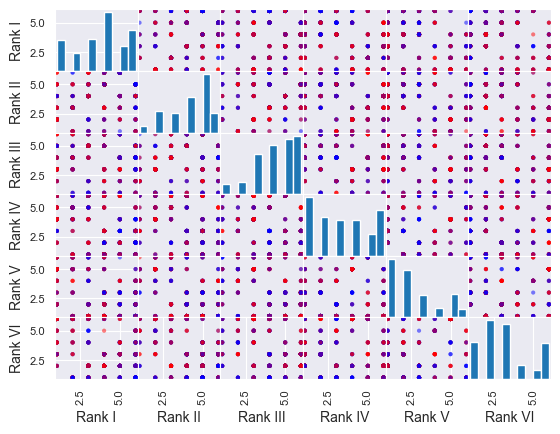

In [ ]:
pd.plotting.scatter_matrix(sw_ccc[['Rank I', 'Rank II', 'Rank III', 'Rank IV', 'Rank V', 'Rank VI']], c=sw_ccc['Old'], cmap='bwr')

In [ ]:
sw_arr = sw_ccc[['Rank I', 'Rank II', 'Rank III', 'Rank IV', 'Rank V', 'Rank VI']].to_numpy()
set([tuple(sw_arr[i]) for i in range(len(sw_arr))])

{(np.float64(1.0),
  np.float64(2.0),
  np.float64(3.0),
  np.float64(4.0),
  np.float64(5.0),
  np.float64(6.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(3.0),
  np.float64(4.0),
  np.float64(6.0),
  np.float64(5.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(3.0),
  np.float64(5.0),
  np.float64(6.0),
  np.float64(4.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(3.0),
  np.float64(6.0),
  np.float64(4.0),
  np.float64(5.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(3.0),
  np.float64(6.0),
  np.float64(5.0),
  np.float64(4.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(4.0),
  np.float64(5.0),
  np.float64(6.0),
  np.float64(3.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(5.0),
  np.float64(6.0),
  np.float64(3.0),
  np.float64(4.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(5.0),
  np.float64(6.0),
  np.float64(4.0),
  np.float64(3.0)),
 (np.float64(1.0),
  np.float64(2.0),
  np.float64(6.0),
  np.float64(3.0),
  np

In [ ]:
titan = pd.read_csv('titanic_train.csv')

In [ ]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titan_c = titan[titan['Age'].notna()]
titan_c.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
X = titan_c[['Pclass','Age','SibSp','Parch','Fare']].to_numpy()
y = titan_c['Survived'].to_numpy()

In [ ]:
model = LogisticRegression(max_iter=300).fit(X, y)

In [ ]:
model.coef_

array([[-1.12828357, -0.04396687, -0.2880343 ,  0.24078797,  0.00353013]])

In [ ]:
smp_i = np.random.randint(len(X), size=100)
np.sum(np.abs(model.predict(X[smp_i]) - y[smp_i]))

np.int64(29)

In [62]:
spam = pd.read_csv('spambase_csv.csv')
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [63]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [64]:
X = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free','word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting','capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']].to_numpy()
y = spam['class'].to_numpy()

In [65]:
model = LogisticRegression(max_iter=500).fit(X,y)

c:\Users\gener\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
smp_i = np.random.randint(len(X), size=100)
np.sum(np.abs(model.predict(X[smp_i]) - y[smp_i]))

np.int64(10)

In [68]:
model.coef_

array([[-2.05575082e-01, -1.38412292e-01,  2.60727106e-01,
         6.09180528e-01,  5.32994957e-01,  9.27750360e-01,
         2.72641914e+00,  6.79468440e-01,  1.18364231e+00,
         7.09366860e-02, -1.13259461e-01, -5.32101093e-02,
         2.14712118e-01,  1.69481648e-01,  7.39676350e-01,
         1.26969487e+00,  9.33032592e-01,  2.91382054e-01,
         5.03109749e-02,  9.48145928e-01,  2.32548310e-01,
         1.34597769e-01,  2.58468398e+00,  8.86277970e-01,
        -1.72335761e+00, -9.94531431e-01, -3.99941663e+00,
         2.51529140e-01, -1.04202570e+00, -3.69367799e-01,
        -4.72047107e-01, -1.68950730e-01, -1.03232516e+00,
        -9.80577944e-02, -6.31813276e-01,  8.19655552e-01,
        -2.67432424e-01, -5.36600385e-01, -1.08049511e+00,
        -2.78774015e-01, -1.65631312e+00, -1.86236933e+00,
         7.48821532e-03,  9.95906612e-03,  5.90003102e-04]])

In [70]:
c1 = X@(model.coef_).T
c2 = X@np.array([[0, 0,  0,
         0,  0,  0,
         -1.26969487e+00,  0,  0,
         0, 0, 0,
         0, 0,  0,
         2.72641914e+00,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0,
         0,  0,  0]]).T

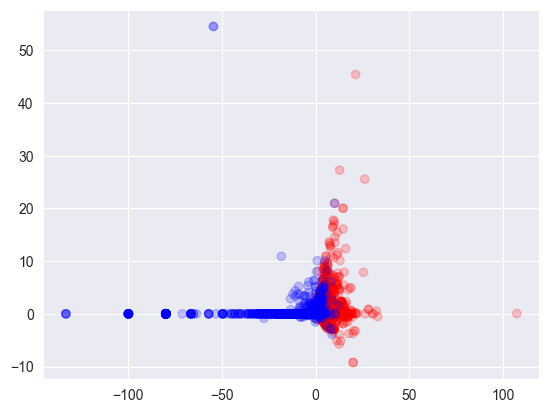

In [72]:
plt.scatter(c1,c2,c=y, alpha=0.2, cmap='bwr')
plt.show()

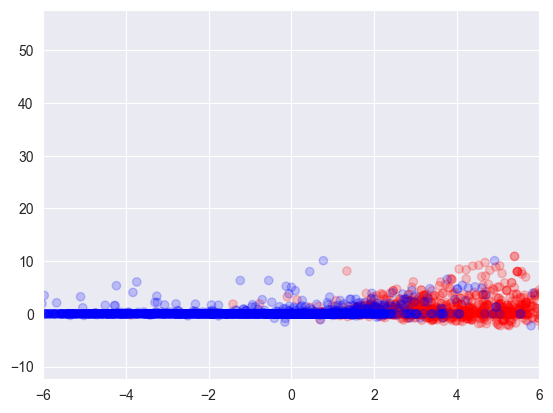

In [73]:
plt.scatter(c1,c2,c=y, alpha=0.2, cmap='bwr')
plt.xlim((-6,6))
plt.show()

In [74]:
data = sklearn.datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [89]:
x = data['data']
y = data['target']

In [79]:
set(y)

{np.int64(0), np.int64(1), np.int64(2)}

In [80]:
y_new = (y==0).astype('int32')

In [90]:
y_new = 2*y_new-1
y_new

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int32)

In [92]:
np.where(y_new < 0)[0][0]

np.int64(50)

In [118]:
def perceptron(inputx, labels, maxr = 15000):
  # Initiate W as list of zeros, with length = one plus length of first vector in x
  W = np.zeros(len(inputx[0])+1)
  # Make X vectors: 1 appended at end
  
  X = np.hstack((inputx, np.ones(len(inputx)).reshape(len(inputx),1)))
  # counter: total number of times so far through instance list; 
  # done: remains 1 to end of while loop only if all the products are &amp;gt;0
  # T: number of updates to W 
  counter, T = 0, 1
  # while loop ends if counter reaches maxr 
  while counter <= maxr: 
    counter += 1 
    products = labels*(X@W)
    try: 
      i = np.where(products <= 0)[0][0]
      W += labels[i]*X[i]
      T += 1
    except IndexError:
      break
  print('Finished computation: T = ', T) 
  return W

In [119]:
Wresult = perceptron(x, y_new)
print(Wresult)

Finished computation: T =  6
[ 1.3  4.1 -5.2 -2.2  1. ]


In [120]:
ix = np.random.randint(150)
Wresult[:4]@x[ix] + 1, y_new[ix]

(np.float64(-11.020000000000014), np.int32(-1))

In [121]:
exX = np.array([[-1,3],[-1,-1],[3,-1],[0,1.5]])
exy = np.array([-1,-1,1,1])
perceptron(exX, exy)

Finished computation: T =  10


array([ 4. , -0.5,  1. ])